<a href="https://colab.research.google.com/github/appyjais/Text-Classification-and-summary/blob/main/Text_Classification_and_top_phrase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = '/content/drive/MyDrive/Assignment/securly/dataset/dataset/train.csv/train.csv'
df = pd.read_csv(path)


In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df['len'] = df['comment_text'].str.len()

In [5]:
pd.set_option('display.max_colwidth', -1)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,264
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0,67


In [6]:
sum(df.duplicated())

0

# EDA

In [7]:
df[df['toxic']==1]['comment_text'].head()

6     COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
12    Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...  

In [8]:
df[df['severe_toxic']==1]['comment_text'].head()

6      COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK                                             
55     Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!
181    you are a stupid fuck \n\nand your mother's cunt stinks                                  
442    Hi \n\nIm a fucking bitch.\n\n50.180.208.181                                             
579    What a motherfucking piece of crap those fuckheads for blocking us!                      
Name: comment_text, dtype: object

In [9]:
df[df['obscene']==1]['comment_text'].head()

6     COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
42    You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - 

In [10]:
df[df['threat']==1]['comment_text'].head()

79      Hi! I am back again!\nLast warning!\nStop undoing my edits or die!                                                                                    
176     I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms                      
600     I'm also a sock puppet of this account...SUPRISE!!\n-sincerely,\n            The man that will track you down from the Internet and kill you          
802     Fuck you, Smith. Please have me notified when you die. I want to dance on your grave.                                                                 
1017    WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'LL FIND OUT WHERE YOU LIVE, SODOMIZE YOUR WIFE AND THEN BURN YOUR HOUSE DOWN. FUCK YOU YOU FUCKING QUEER.
Name: comment_text, dtype: object

In [11]:
df[df['insult']==1]['comment_text'].head()

6     COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
42    You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - 

In [12]:
df[df['identity_hate']==1]['comment_text'].head()

42     You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!
105    A pair of jew-hating weiner nazi schmucks.                                                                                                                                                                                                                                                                                         

In [13]:
print(df.shape)
n = df.shape[0]

(159571, 9)


In [14]:
tags = ['toxic', 'severe_toxic','obscene', 'threat', 'insult', 'identity_hate']


class toxic appear max no. of times with 9% of data
class severe toxic min no. of times with .9% of data


In [15]:
df['Total_Tags'] = df['toxic'] + df['severe_toxic'] + df['obscene'] + df['threat'] + df['insult'] + df['identity_hate']

In [16]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len,Total_Tags
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,264,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,112,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0,233,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0,622,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0,67,0


In [17]:
print('safe comments: ',df[df['Total_Tags'] == 0].shape[0]/n*100, '%')

safe comments:  89.83211235124176 %


In [18]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,len,Total_Tags
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,394.073221,0.219952
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,590.720282,0.748260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,435.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000,6.000000


In [19]:
(df.isna().sum()/n*100).reset_index()

,index,0
0,id,0.0
1,comment_text,0.0
2,toxic,0.0
3,severe_toxic,0.0
4,obscene,0.0
5,threat,0.0
6,insult,0.0
7,identity_hate,0.0
8,len,0.0
9,Total_Tags,0.0


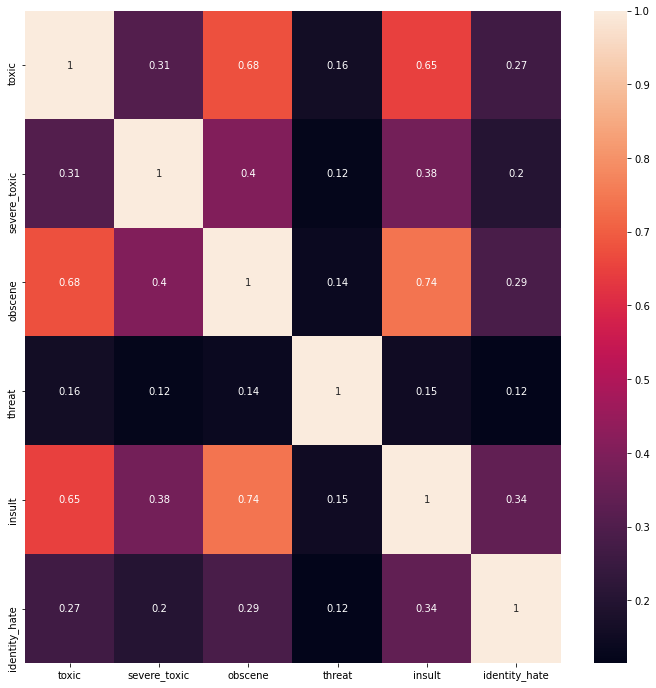

In [20]:
correlation = df[tags].corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation,annot= True)

In [21]:
from wordcloud import WordCloud ,STOPWORDS

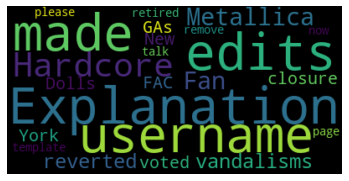

In [22]:
wordcloud = WordCloud().generate(df['comment_text'][0])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
stopwords = set(STOPWORDS) 
for comment in df.comment_text:
  comment_words = ''
  com = str(comment)
  tokens = com.split() 
      
  # Converts each token into lowercase 
  for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
def visualize_word(df):
  stopwords = set(STOPWORDS) 
  for comment in df.comment_text:
    comment_words = ''
    com = str(comment)
    tokens = com.split() 
        
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
      tokens[i] = tokens[i].lower()
      comment_words += " ".join(tokens)+" "
    
  wordcloud = WordCloud(width = 800, height = 800, 
                  background_color ='white', 
                  stopwords = stopwords, 
                  min_font_size = 10).generate(comment_words) 
    
  # plot the WordCloud image                        
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
    
  plt.show() 

Seeing the freq non toxic comment word

In [ ]:
visualize_word(df[df['Total_Tags']==0])

Seeing the freq toxic comments

In [ ]:
visualize_word(df[df['toxic']==1])

Seeing the freq toxic comments

In [ ]:
visualize_word(df[df['toxic']==1])

Seeing the freq severe_toxic comments

In [ ]:
visualize_word(df[df['severe_toxic']==1])

Seeing the freq obscene comments

In [ ]:
visualize_word(df[df['obscene']==1])

Seeing the freq threat comments

In [ ]:
visualize_word(df[df['threat']==1])

Seeing the freq insult comments

In [ ]:
visualize_word(df[df['insult']==1])

Seeing the freq identity_hate comments

In [ ]:
visualize_word(df[df['identity_hate']==1])

# TFIDF

In [ ]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['comment_text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english') and len(word)<100]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
print(corpus[0])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [ ]:
X.shape

In [ ]:
y = df[tags]

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
len(tfidf_v.get_feature_names())

In [ ]:
tfidf_v.get_params()

In [ ]:
print(X_train[1][:])
print(X_train.dtype)

In [ ]:
count_df = pd.DataFrame(X_train.toarray, columns=list(tfidf_v.get_feature_names()))

In [ ]:

import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
df[df['len']=='0']

In [ ]:
s = '     '
print(s.split())